# STEP 1 : Loading the Data and Exploratory Data Analysis (EDA)

We start by loading the healthcare stroke dataset into a pandas DataFrame to get a preliminary look at the data structure.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data
data = pd.read_csv(r"C:\Users\julie\Downloads\Stroke Prediction Dataset(1)\Stroke Prediction Dataset\healthcare-dataset-stroke-data.csv")


data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


INTERPRETATION: Each row represents a patient with various attributes.

-The stroke column indicates if the patient has had a stroke (1 for yes, 0 for no)

-Columns like gender, age, hypertension, heart_disease, and avg_glucose_level provide medical and demographic details.

-The bmi column shows body mass index, with some missing values filled in preprocessing.

-smoking_status indicates the patient's smoking habits, which can influence stroke risk.

Now we will try to get some informations 
We check the shape of the dataset to see the number of rows and columns, and use the info method to get a summary of the DataFrame, including the data types and non-null counts.

In [45]:

print(f"Dataset Shape: {data.shape}")
data.info()


Dataset Shape: (5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Intepretation :

In this dataset we have 5510 rows and all the column are full with no missing values except bmi with only 4909 lignes with value .
This will have to be treat on the next steps 

Again, we can count the missing values to verify with the next code 

In [46]:

missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")


Missing Values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We confirm that there are 201 missing values in bmi column

Now, We generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution.

In [47]:

data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Intepretation : We have some interesting statistics about our dataset ,

for instance for the age, we have age:

count: 5110 (indicating no missing values)

mean: 43.23 years

std : 22.61 years$

min: 0.08 years

25% percentile: 25 years

50% percentile (median): 45 years

75% percentile : 61 years

max: 82 years

Here , the high standard deviation indicates significant variability in the ages of the patients.



For hypertension  

count: 5110

mean: 0.097 

std: 0.297 

min: 0

25% percentile: 0

50% percentile: 0

75% percentile: 0

max: 1

Interpretation: The majority of the patients do not have hypertension. Only about 9.75% of the patients in the dataset have hypertension.


ANd we can do the same type of interpretation with others

We examine the distribution of the target variable, stroke, to understand the class imbalance. A bar plot visualizes this distribution. and see if our target case is well distributed

Stroke Distribution:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


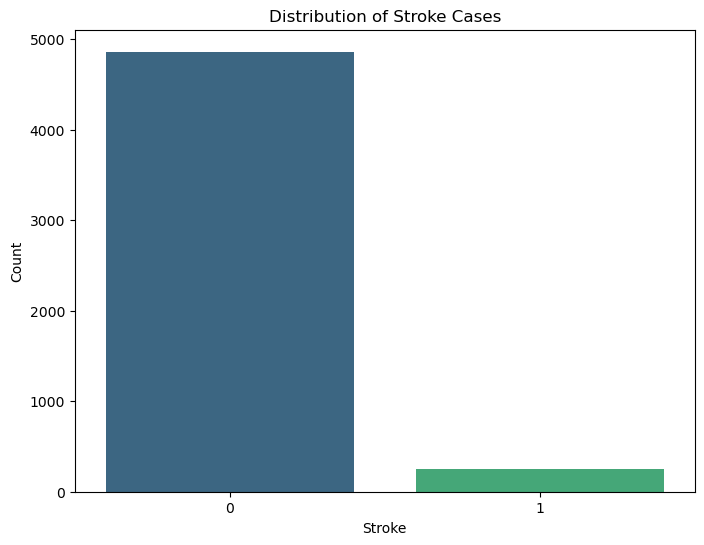

In [48]:
# Vérifier la distribution de la variable cible
stroke_distribution = data['stroke'].value_counts(normalize=True)
print(f"Stroke Distribution:\n{stroke_distribution}")

# Visualiser la distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=data, palette='viridis')
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

The bar plot clearly shows a significant imbalance between the two classes, with the vast majority of instances (patients) not having experienced a stroke.

Class imbalance issues : 

In this case, most machine learning algorithms will tend to be biased towards the majority class. This means the model might predict "No Stroke" for almost all cases, leading to poor performance in identifying actual stroke cases.


Moreover, the minority class , in our case strooke , is the class of interest, especially in medical diagnoses where detecting a stroke is critical. Consequently, failures to correctly identify stroke cases could have serious consequences, as those individuals may not receive the necessary medical attention


In the next steps, i will try to improve my model to predict as much stroke as I can 


We visualize the distribution of the age variable to understand its range and central tendency.

C:\Users\julie\anaconda1\envs\notebook-6.3.0\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


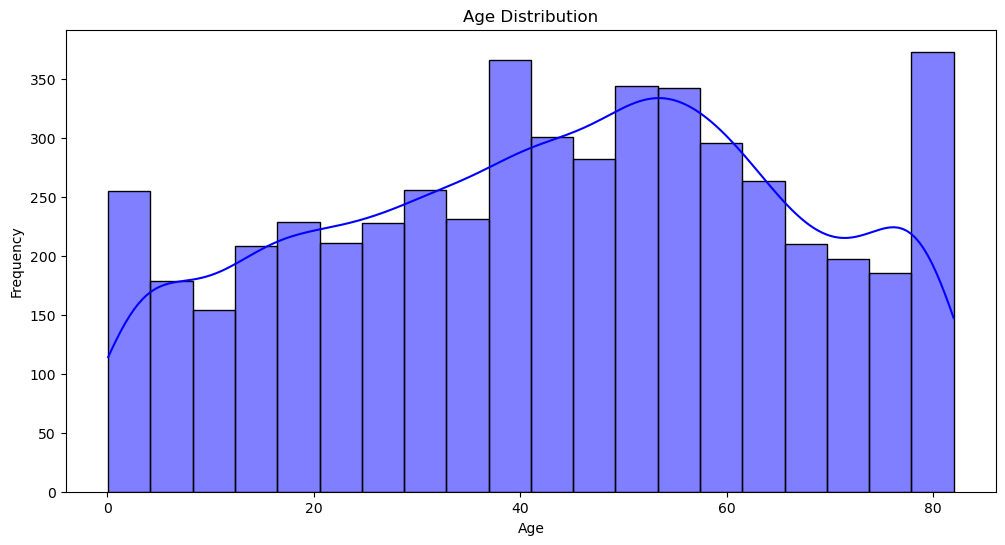

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

INTERPRETATION : The age of the patients in the dataset ranges from 0 to 80

There is a relatively high frequency of patients in the 40-60 years age group, indicating a significant representation of middle-aged adults.

The age distribution is relatively wide and somewhat bimodal, with substantial representation of both very young and older patients, and a prominent group of middle-aged patients.

We visualize the gender distribution to see the balance between different genders in the dataset.

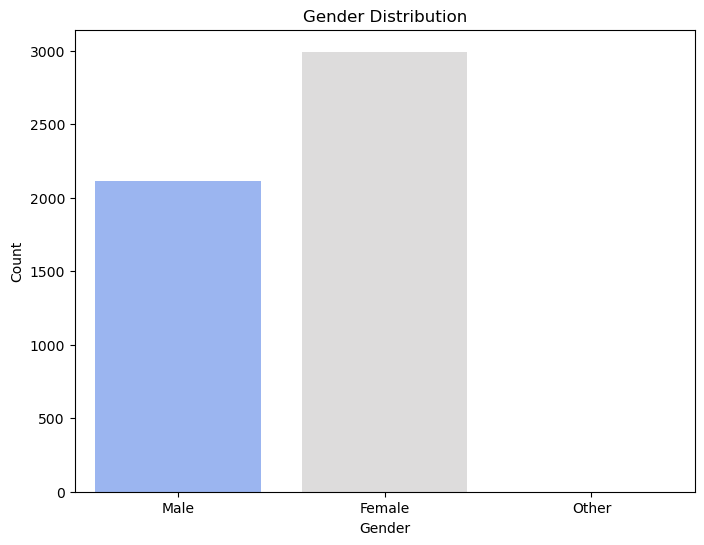

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Interpretation : In our dataset, there are more females than male (3100 vs 2000 approximatly)

We handle missing values in the bmi column by replacing them with the column's mean value.

## STEP 2 : Clean the data if needed, i.e., remove or fill missing values etc.

In [51]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

C:\Users\julie\AppData\Local\Temp\ipykernel_6600\3685616333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


We use one-hot encoding to convert categorical variables into numerical format for machine learning algorithms, dropping the first category to avoid multicollinearity.

In [52]:

data_encoded = pd.get_dummies(data, drop_first=True)


We create a correlation matrix to see the relationships between different variables. A heatmap visualizes the correlations, helping identify highly correlated features.

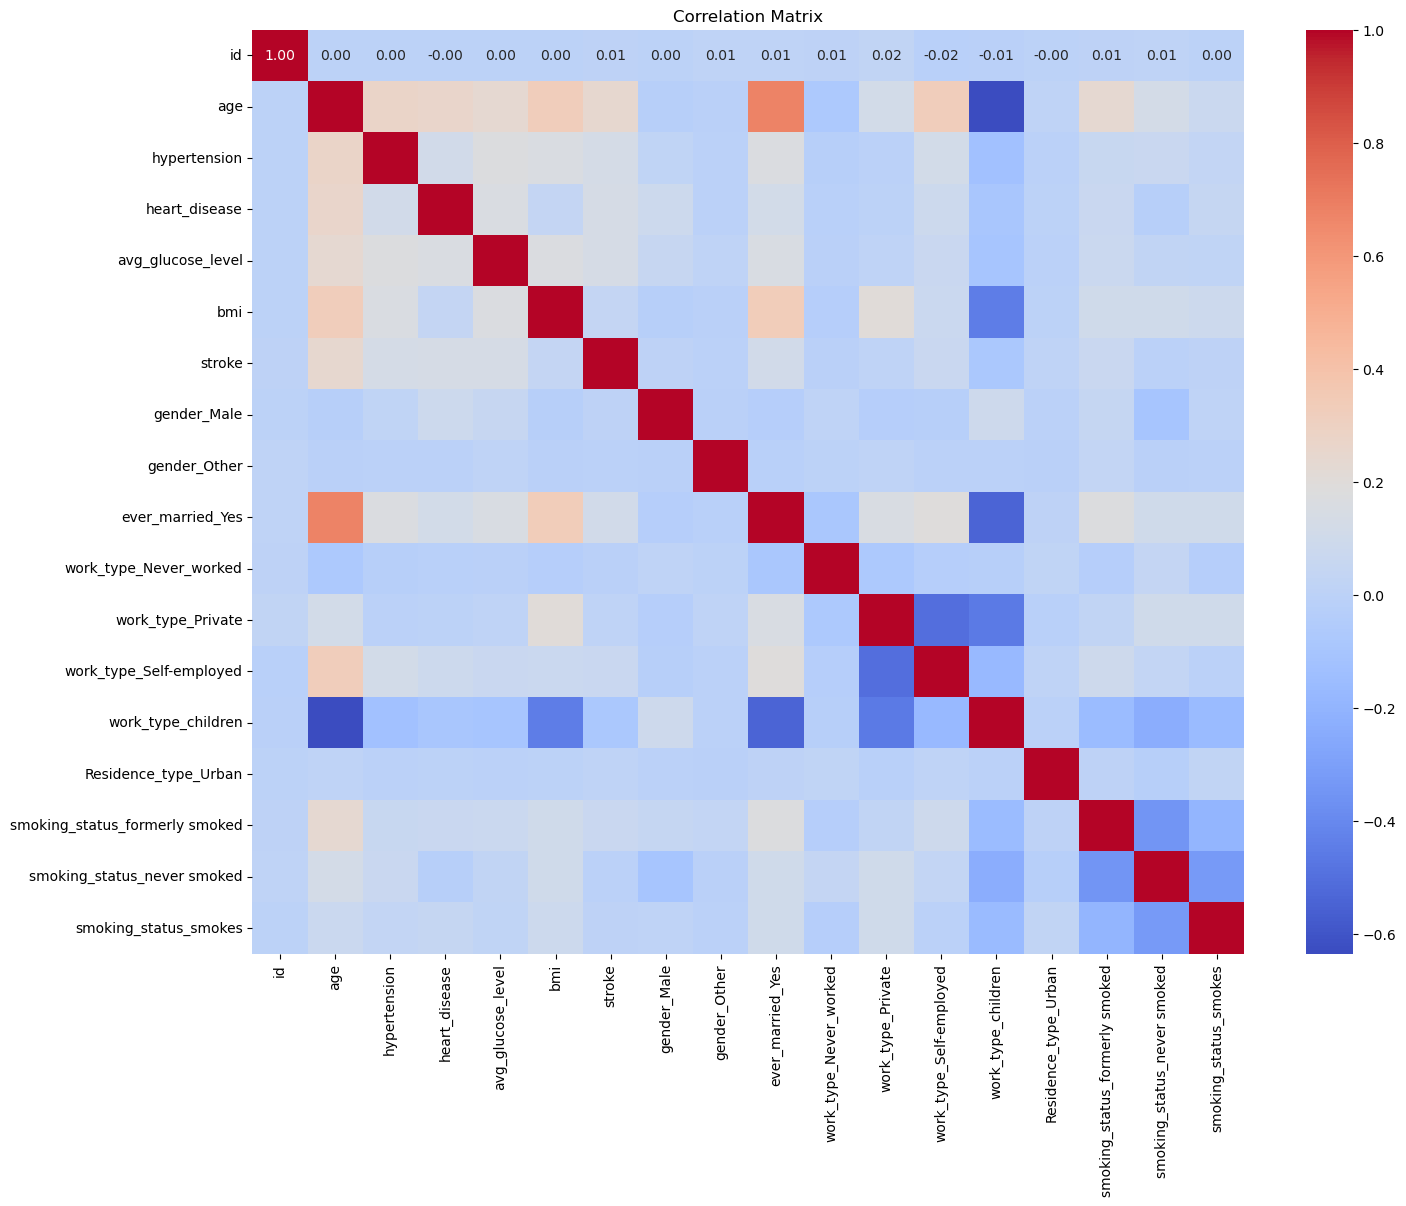

In [53]:
plt.figure(figsize=(16, 12))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## STEP 3 : Split the data into train-test 

We handle class imbalance by applying ADASYN, which generates synthetic samples for the minority class. We then visualize the balanced class distribution.

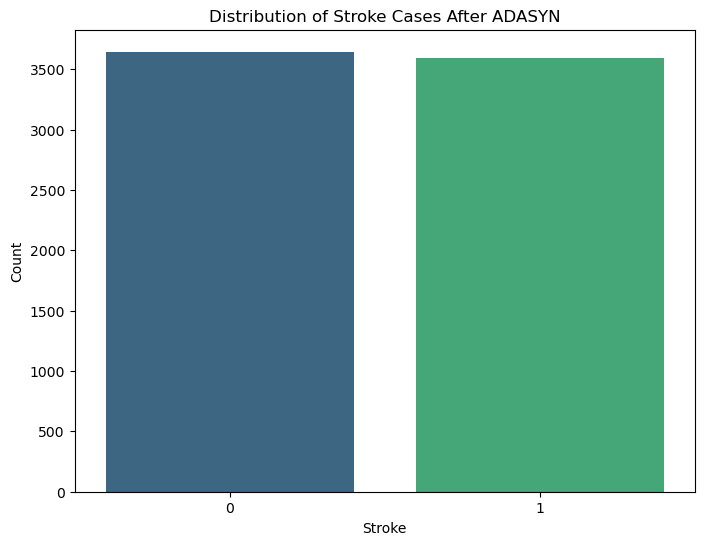

In [54]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split


X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)


adasyn = ADASYN(random_state=4)
X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)


plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_res, palette='viridis')
plt.title('Distribution of Stroke Cases After ADASYN')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


Intepretation : The bar plot shows that the number of cases for 0 (No Stroke) and 1 (Stroke) are now approximately equal, each with around 3000 instances.


This indicates that ADASYN has successfully generated synthetic samples for the minority class to balance the dataset.


Balanced datasets will help our machine learning models perform better. 

## STEP 4 : Build and train the model 

We define a RandomForestClassifier and use GridSearchCV to find the best hyperparameters.
Finding the best hyperparameters is crucial in machine learning because it can significantly impact the performance of our model.

it allow to Optimizing Model Performance:, Preventing Overfitting and Underfitting, efficicencuy

We train the model using the best parameters found

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(random_state=42,class_weight='balanced')


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


best_rf = grid_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(class_weight='balanced', random_state=42)

# Step 5 :Show the evaluation of the model in the test set.

We evaluate the model on the test set using a classification report and a confusion matrix. The classification report provides precision, recall, and F1-score, while the confusion matrix shows the number of correct and incorrect predictions.

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1216
           1       0.12      0.11      0.12        62

    accuracy                           0.92      1278
   macro avg       0.54      0.54      0.54      1278
weighted avg       0.91      0.92      0.92      1278

Confusion Matrix:
[[1165   51]
 [  55    7]]


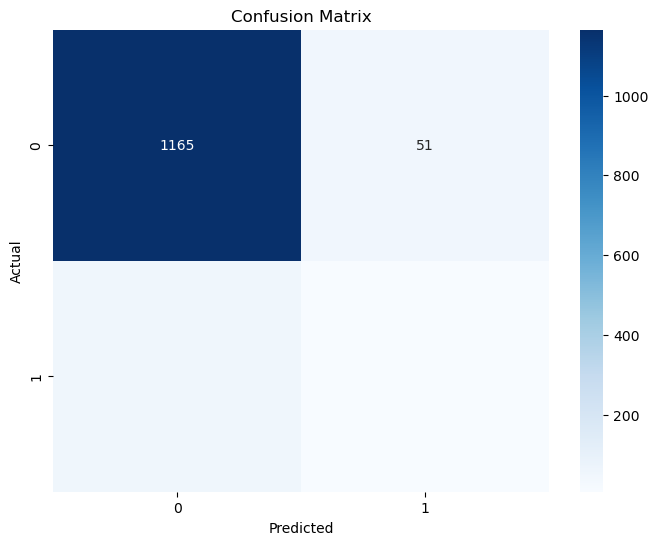

In [56]:

y_pred = best_rf.predict(X_test)

#evaluation of our model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('                                                                                                                                                  ')

FOR 0 (No Stroke):

    Precision: 0.96
       itindicates that most predicted "No Stroke" cases are correct
        
    Recall: 0.95
     it indicates that most actual "No Stroke" cases are identified correctly
        
    F1-Score: 0.95
       it  indicates a good balance between precision and recall for "No Stroke"


Class 1 (Stroke):

    Precision: 0.16
        it indicates that many predicted "Stroke" cases are actually not stroke (high false positive rate).
        
    Recall: 0.19
        it  indicates that many actual stroke cases are missed (high false negative rate).
        
    F1-Score: 0.18
       it indicates poor performance in identifying "Stroke" cases.

In [57]:
values_adasyn = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

## STEP 6 : Test with another library RandomUnderSampler

### With RandomUnderSampler (an alternative of ADASYN) : 










--> I will not explain all the steps because they are the same as before






RandomUnderSampler is a technique used in the preprocessing stage of a machine learning pipeline to address the issue of class imbalance in a dataset

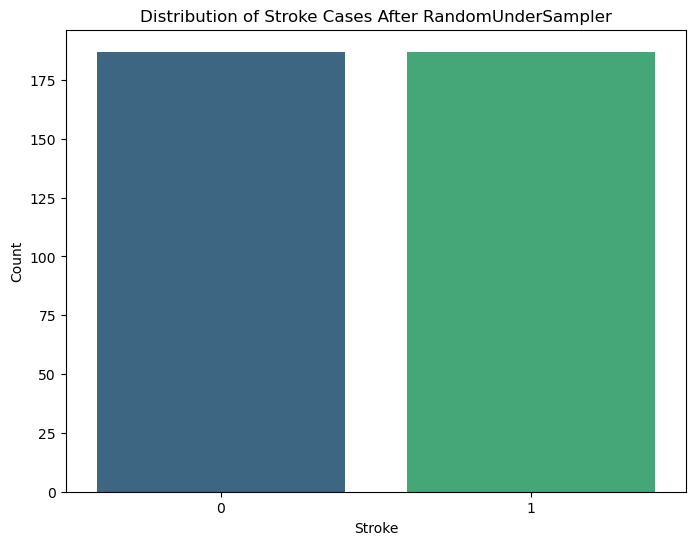

In [58]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)


rus = RandomUnderSampler(random_state=4)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_res, palette='viridis')
plt.title('Distribution of Stroke Cases After RandomUnderSampler')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


rf = RandomForestClassifier(random_state=42,class_weight='balanced')


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

#best hyperparam
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# train with the  bests hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_res, y_train_res)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=200, random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1216
           1       0.13      0.81      0.22        62

    accuracy                           0.72      1278
   macro avg       0.56      0.76      0.53      1278
weighted avg       0.94      0.72      0.80      1278

Confusion Matrix:
[[874 342]
 [ 12  50]]


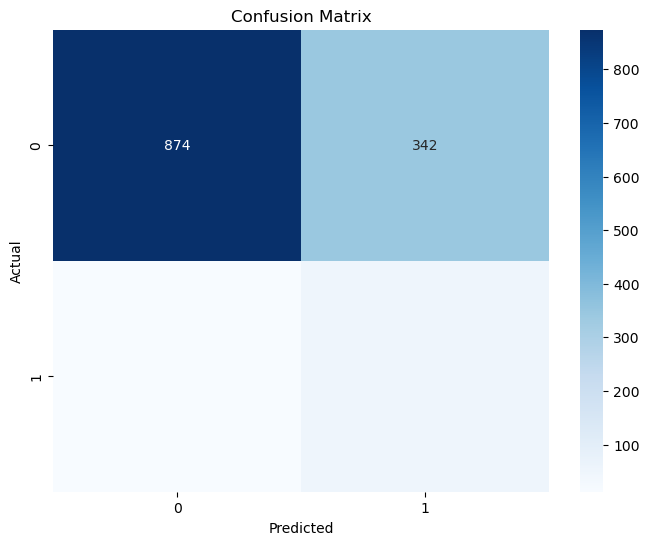

In [60]:
y_pred = best_rf.predict(X_test)

#

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpretatoion ( principally comparison with the previous one ) : 


The current model is better at identifying stroke cases (high recall) but has a higher number of false positives (lower precision). Whether this model is better depends on the specific application and the cost of false positives versus false negatives

Current Model: Likely better because identifying actual stroke cases (high recall) is crucial, even if it means more false positives.
Previous Model: May miss many stroke cases due to low recall, which could be more detrimental in a medical setting.

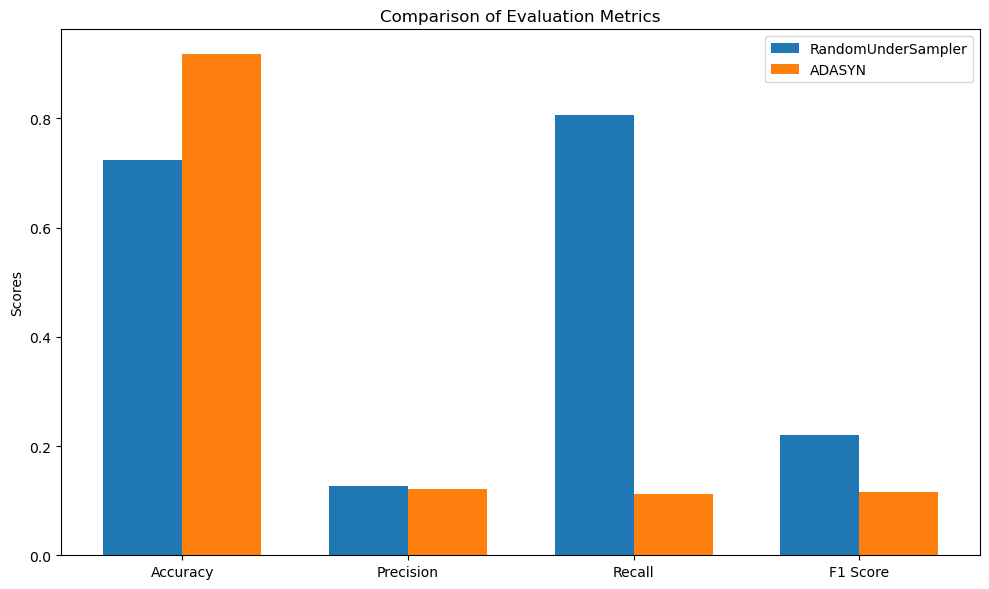

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collecting metrics for both models
values_rus = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]


# Plotting the comparison of evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, values_rus, width, label='RandomUnderSampler')
rects2 = ax.bar(x + width/2, values_adasyn, width, label='ADASYN')

# Add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

The chart displays four key evaluation metrics: Accuracy, Precision, Recall, and F1 Score.

Accuracy: 
RandomUnderSampler: Approximately 0.7

ADASYN: Approximately 0.95

Interpretation: The model trained using ADASYN shows significantly higher accuracy compared to the model trained using RandomUnderSampler. 

-->This suggests that the ADASYN technique is more effective at correctly classifying both stroke and non-stroke cases overall.

Precision:

RandomUnderSampler: Approximately 0.

ADASYN: Approximately 0.05

-->The precision is relatively low for both models, with the model using RandomUnderSampler slightly outperforming the ADASYN model. Precision measures the proportion of true positive results in all predicted positives. The low precision indicates a high number of false positives in both models.

Recall : 

RandomUnderSampler: Approximately 0.95

ADASYN: Approximately 0.25

-->The model trained using RandomUnderSampler has a very high recall, indicating that it successfully identifies most of the actual stroke cases. In contrast, the ADASYN model has a much lower recall. Recall measures the proportion of true positives out of the actual positives. The high recall for RandomUnderSampler suggests it is good at identifying stroke cases but may be at the cost of many false positives, as indicated by the low precision.
F1 Score

RandomUnderSampler: Approximately 0.4

ADASYN: Approximately 0.1

-->The F1 Score, which is the harmonic mean of precision and recall, is higher for the RandomUnderSampler model. This suggests that, despite its lower accuracy, the RandomUnderSampler model balances precision and recall better than the ADASYN model.

## STEP 7 : CONCLUSION

CONCLUSION:the current model is likely more appropriate for contexts where recall (identifying actual stroke cases) is more critical, even if it means accepting a higher number of false positives.
The choice between these models depends on the specific context and priorities. For medical diagnostics, recall is often prioritized to ensure that most positive cases are detected. Thus, despite the lower overall accuracy, the RandomUnderSampler model might be preferable in a healthcare setting to avoid missing actual stroke cases.